# Data Visualization Report 

## HEART FAILURE PREDICTION

### DATE: 30-12-2023    DONE BY: Benecia

In [3]:
#Importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
data=pd.read_csv('heart.csv')
data

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


In [25]:
print(data.head())

   Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  MaxHR  \
0   40   M           ATA        140          289          0     Normal    172   
1   49   F           NAP        160          180          0     Normal    156   
2   37   M           ATA        130          283          0         ST     98   
3   48   F           ASY        138          214          0     Normal    108   
4   54   M           NAP        150          195          0     Normal    122   

  ExerciseAngina  Oldpeak ST_Slope  HeartDisease  
0              N      0.0       Up             0  
1              N      1.0     Flat             1  
2              N      0.0       Up             0  
3              Y      1.5     Flat             1  
4              N      0.0       Up             0  


In [26]:
print(data.tail())

     Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  \
913   45   M            TA        110          264          0     Normal   
914   68   M           ASY        144          193          1     Normal   
915   57   M           ASY        130          131          0     Normal   
916   57   F           ATA        130          236          0        LVH   
917   38   M           NAP        138          175          0     Normal   

     MaxHR ExerciseAngina  Oldpeak ST_Slope  HeartDisease  
913    132              N      1.2     Flat             1  
914    141              N      3.4     Flat             1  
915    115              Y      1.2     Flat             1  
916    174              N      0.0     Flat             1  
917    173              N      0.0       Up             0  


In [27]:
data.isna().any() #Checking for null values

Age               False
Sex               False
ChestPainType     False
RestingBP         False
Cholesterol       False
FastingBS         False
RestingECG        False
MaxHR             False
ExerciseAngina    False
Oldpeak           False
ST_Slope          False
HeartDisease      False
dtype: bool

In [28]:
data.isnull().sum() #Getting the sum of null values

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [10]:
data.duplicated() #checking for any duplicate values

0      False
1      False
2      False
3      False
4      False
       ...  
913    False
914    False
915    False
916    False
917    False
Length: 918, dtype: bool

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [12]:
data.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [13]:
data.shape

(918, 12)

In [14]:
data.size

11016

In [15]:
data.index

RangeIndex(start=0, stop=918, step=1)

In [16]:
data.dtypes

Age                 int64
Sex                object
ChestPainType      object
RestingBP           int64
Cholesterol         int64
FastingBS           int64
RestingECG         object
MaxHR               int64
ExerciseAngina     object
Oldpeak           float64
ST_Slope           object
HeartDisease        int64
dtype: object

In [17]:
data.columns

Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartDisease'],
      dtype='object')

In [18]:
data.nunique()

Age                50
Sex                 2
ChestPainType       4
RestingBP          67
Cholesterol       222
FastingBS           2
RestingECG          3
MaxHR             119
ExerciseAngina      2
Oldpeak            53
ST_Slope            3
HeartDisease        2
dtype: int64

In [19]:
data.memory_usage()

Index              132
Age               7344
Sex               7344
ChestPainType     7344
RestingBP         7344
Cholesterol       7344
FastingBS         7344
RestingECG        7344
MaxHR             7344
ExerciseAngina    7344
Oldpeak           7344
ST_Slope          7344
HeartDisease      7344
dtype: int64

In [20]:
data.corr()

C:\Users\benec\AppData\Local\Temp\ipykernel_5988\2627137660.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corr()


,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
Age,1.000000,0.254399,-0.095282,0.198039,-0.382045,0.258612,0.282039
RestingBP,0.254399,1.000000,0.100893,0.070193,-0.112135,0.164803,0.107589
Cholesterol,-0.095282,0.100893,1.000000,-0.260974,0.235792,0.050148,-0.232741
FastingBS,0.198039,0.070193,-0.260974,1.000000,-0.131438,0.052698,0.267291
MaxHR,-0.382045,-0.112135,0.235792,-0.131438,1.000000,-0.160691,-0.400421
Oldpeak,0.258612,0.164803,0.050148,0.052698,-0.160691,1.000000,0.403951
HeartDisease,0.282039,0.107589,-0.232741,0.267291,-0.400421,0.403951,1.000000


Text(0.5, 1.0, 'Distribution of target class')

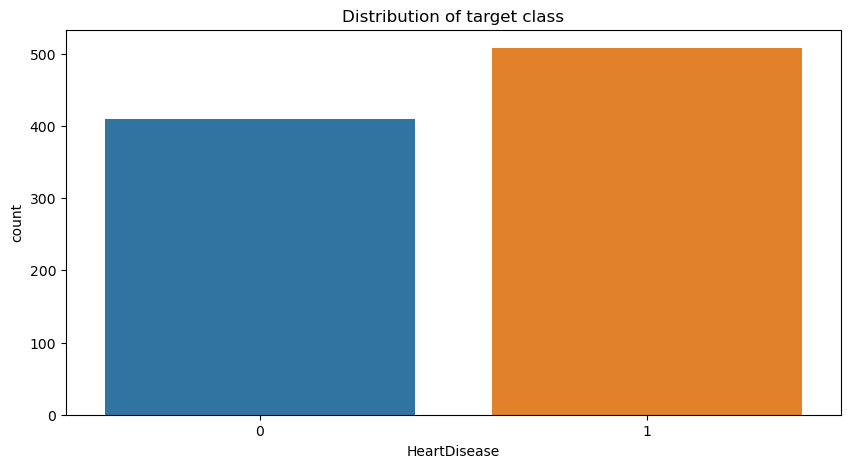

In [21]:
plt.figure(figsize=(10, 5))
sns.countplot(x='HeartDisease', data=data)
plt.title("Distribution of target class")

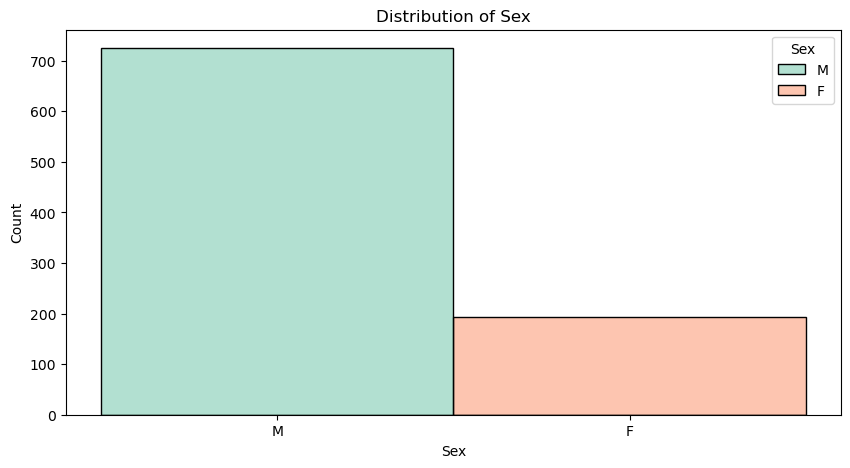

In [79]:
plt.figure(figsize=(10,5))
sns.histplot(data=data, x="Sex", hue="Sex",palette="Set2")
plt.title("Distribution of Sex")
plt.show()

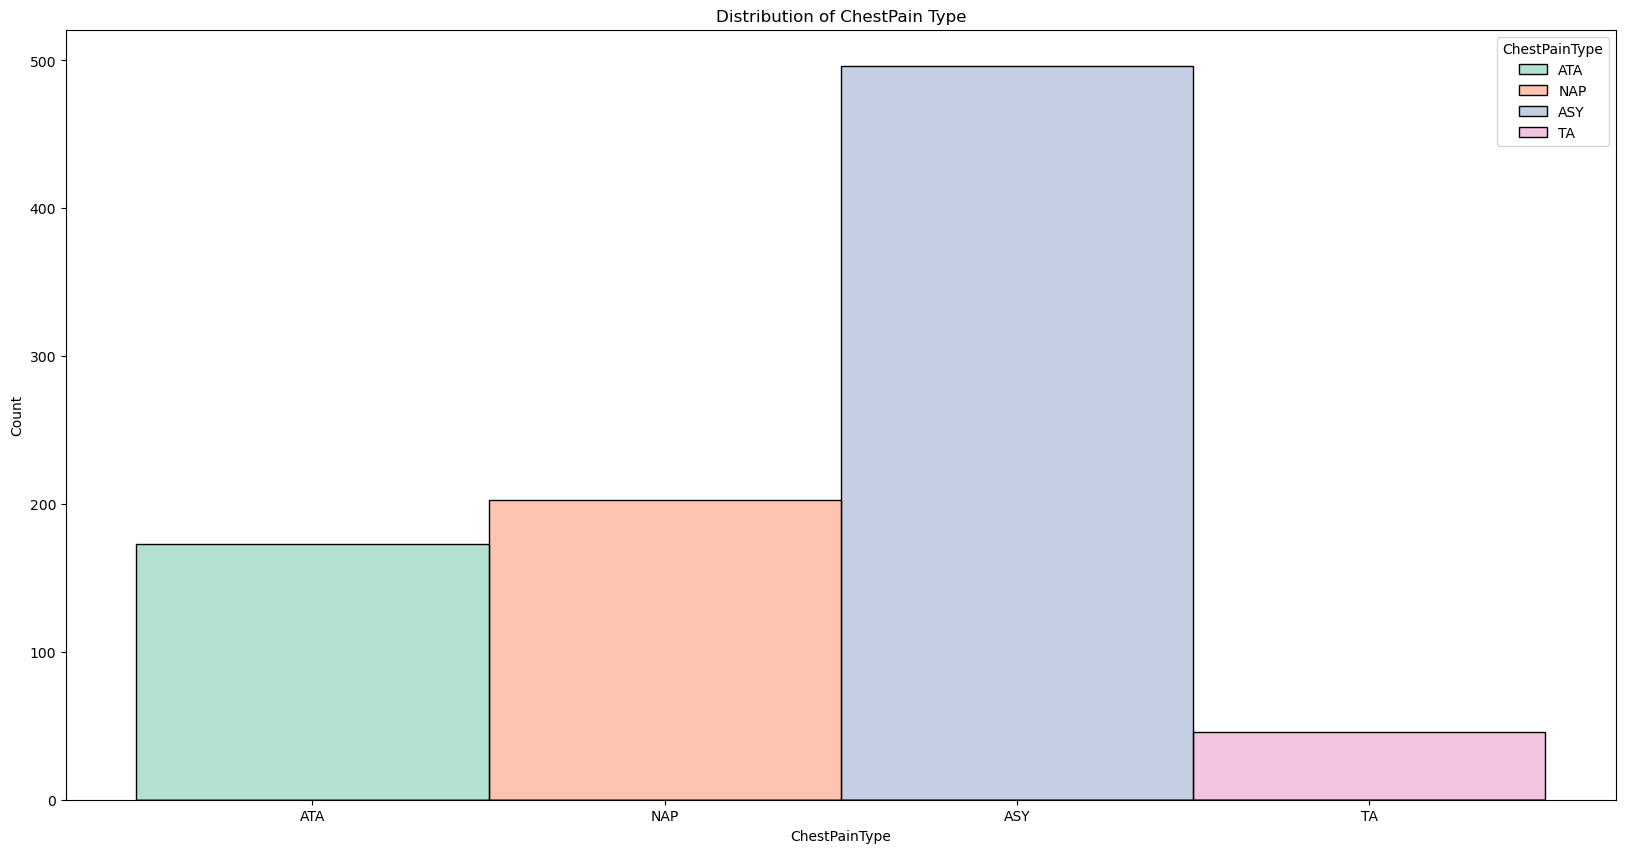

In [36]:
plt.figure(figsize=(20, 10))
sns.histplot(data=data,x="ChestPainType", hue="ChestPainType",palette="Set2")
plt.title("Distribution of ChestPain Type")
plt.show()

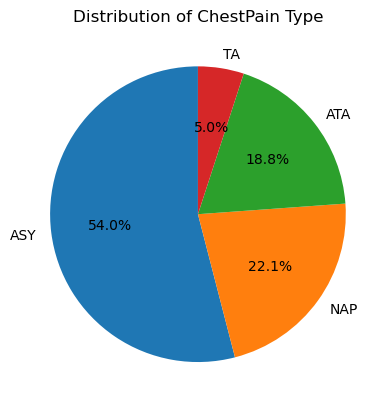

In [37]:
counts = data['ChestPainType'].value_counts()
plt.pie(counts, labels=counts.index, autopct='%1.1f%%', startangle=90)
plt.title("Distribution of ChestPain Type")
plt.show()

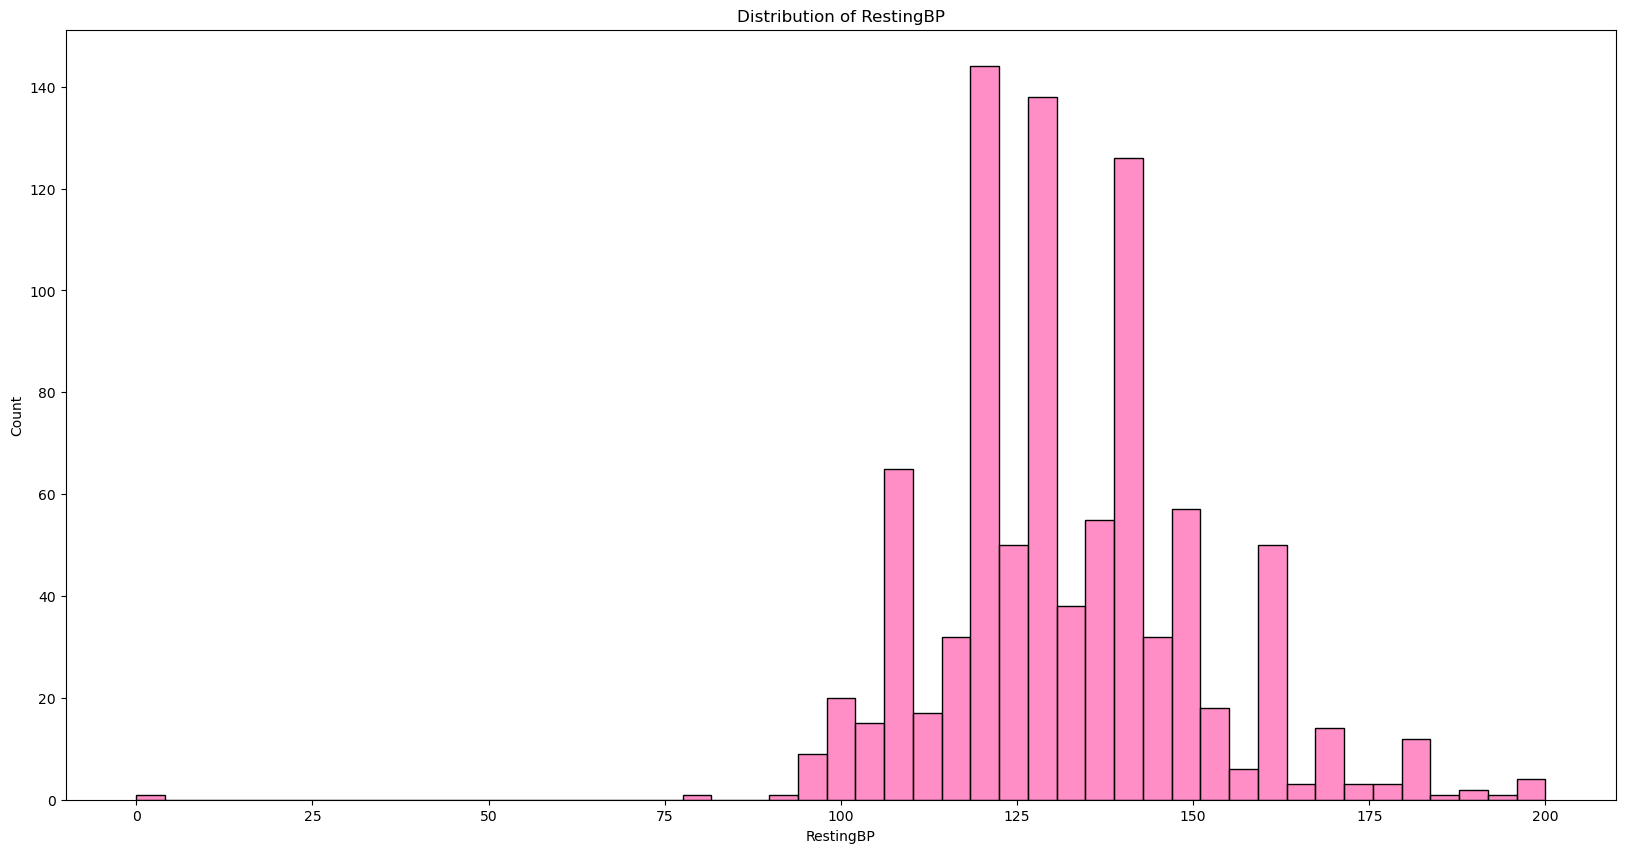

In [44]:
plt.figure(figsize=(20, 10))
sns.histplot(data=data, x="RestingBP",color='hotpink' )
plt.title("Distribution of RestingBP")
plt.show()

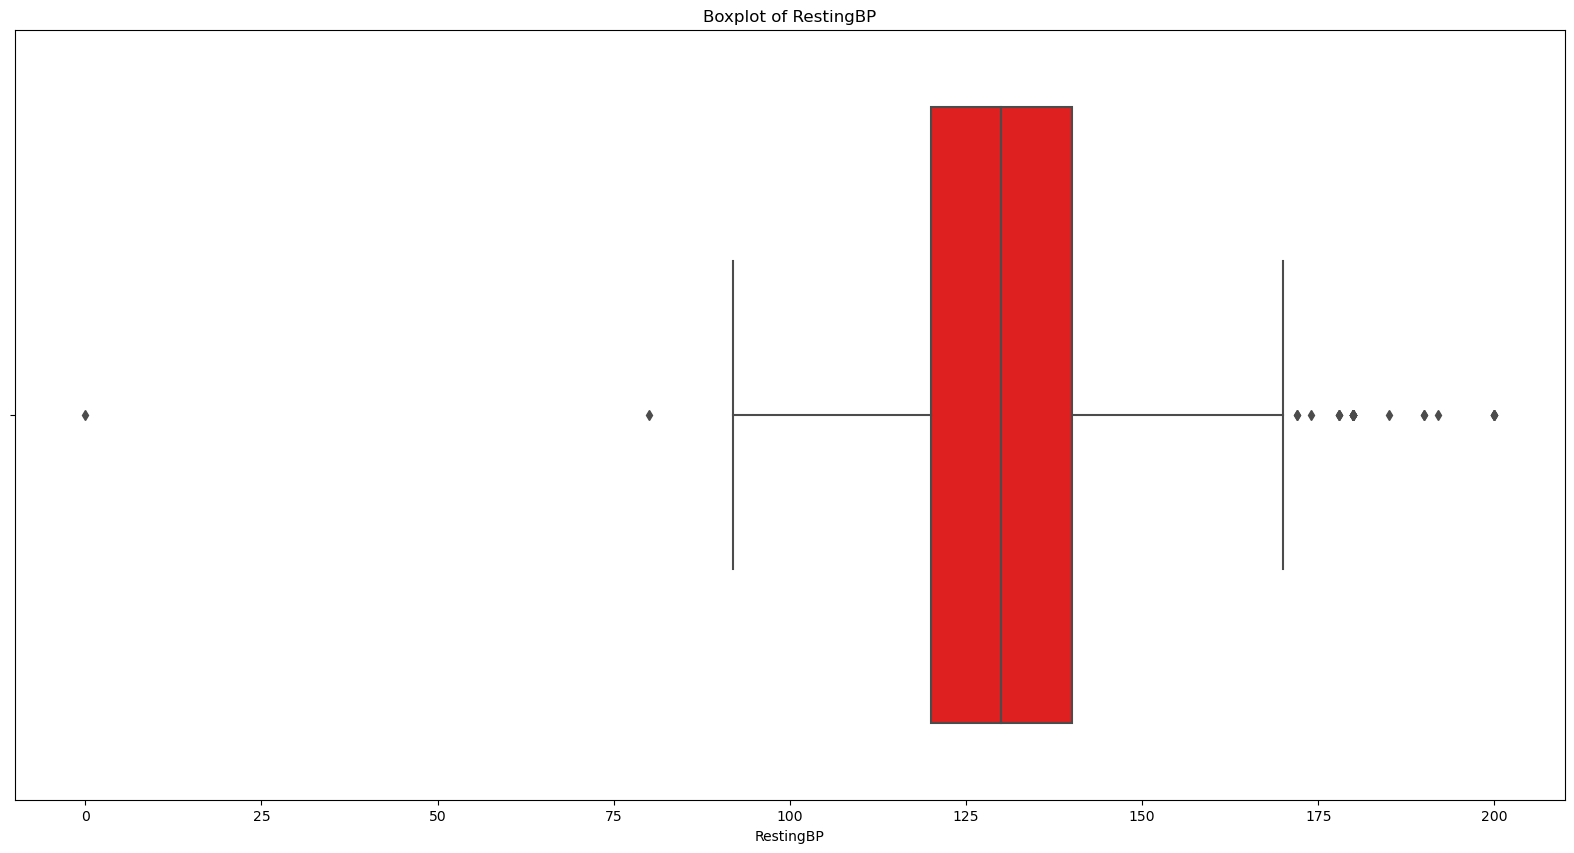

In [43]:
plt.figure(figsize=(20, 10))
sns.boxplot(data=data, x="RestingBP",color="Red")
plt.title("Boxplot of RestingBP")
plt.show()


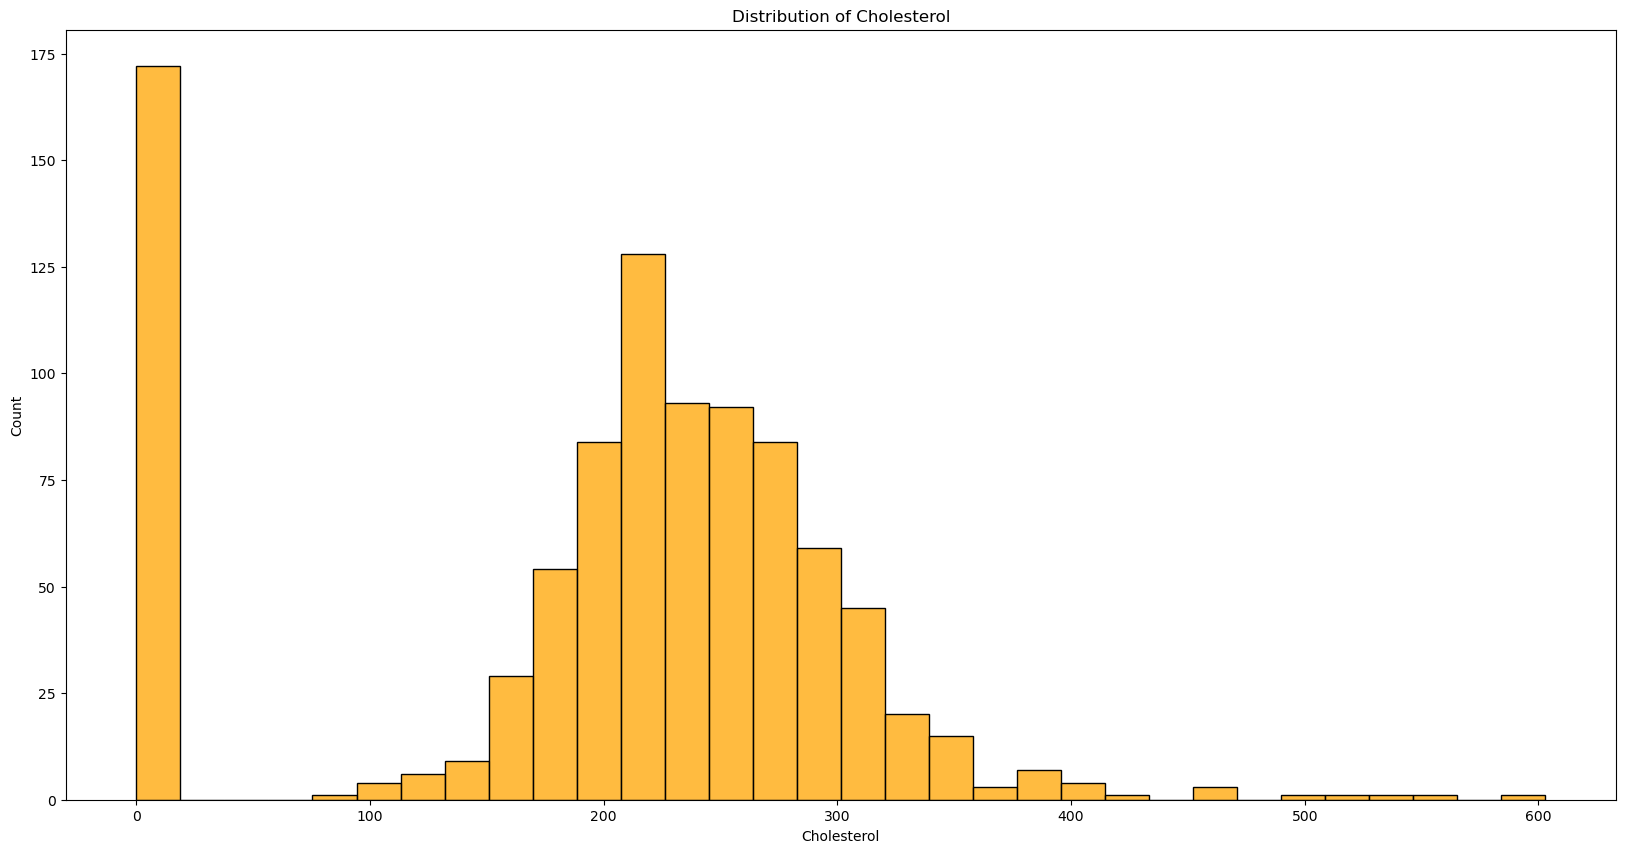

In [47]:
plt.figure(figsize=(20, 10))
sns.histplot(data=data, x="Cholesterol",color="Orange")
plt.title("Distribution of Cholesterol")
plt.show()

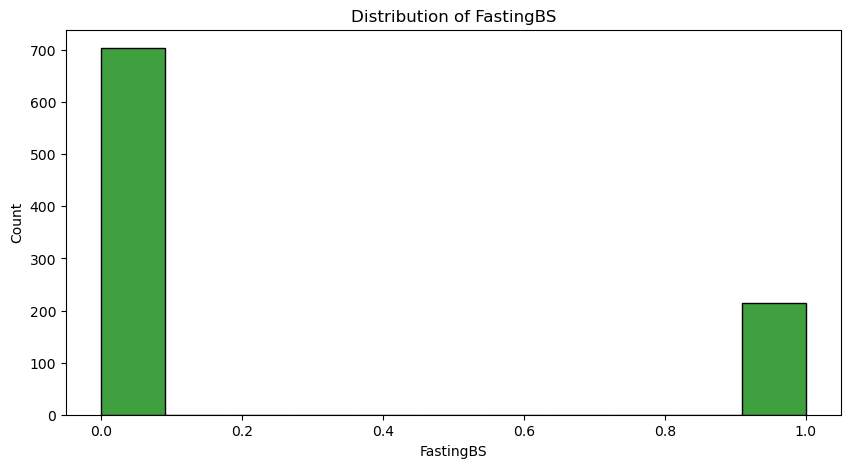

In [55]:
plt.figure(figsize=(10,5))
sns.histplot(data=data, x="FastingBS",color="Green")
plt.title("Distribution of FastingBS")
plt.show()

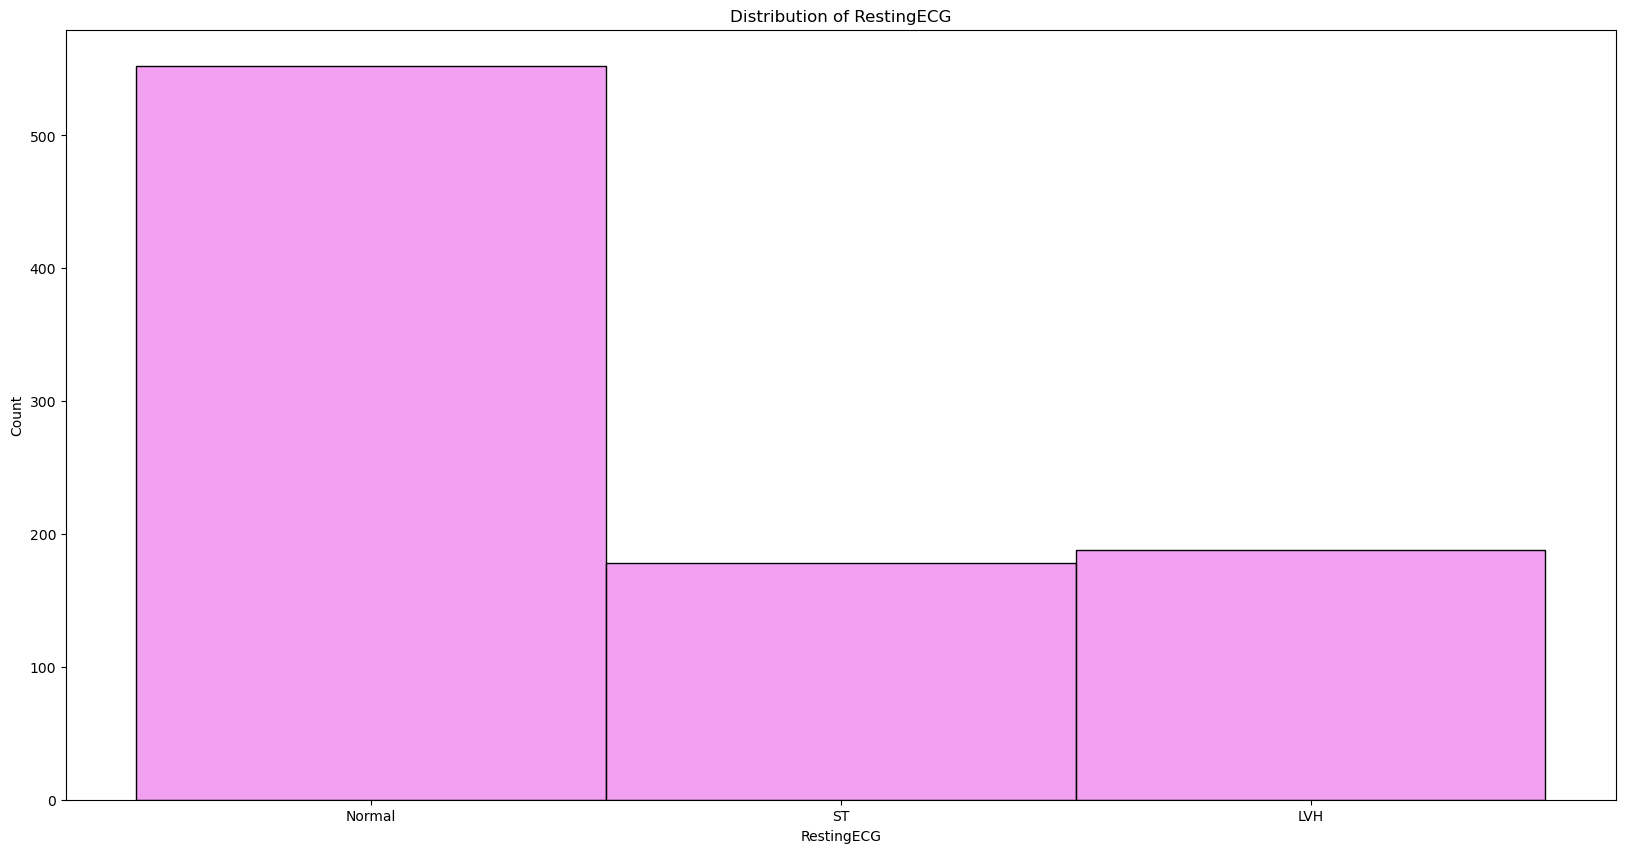

In [57]:
plt.figure(figsize=(20, 10))
sns.histplot(data=data, x="RestingECG",color="Violet")
plt.title("Distribution of RestingECG")
plt.show()

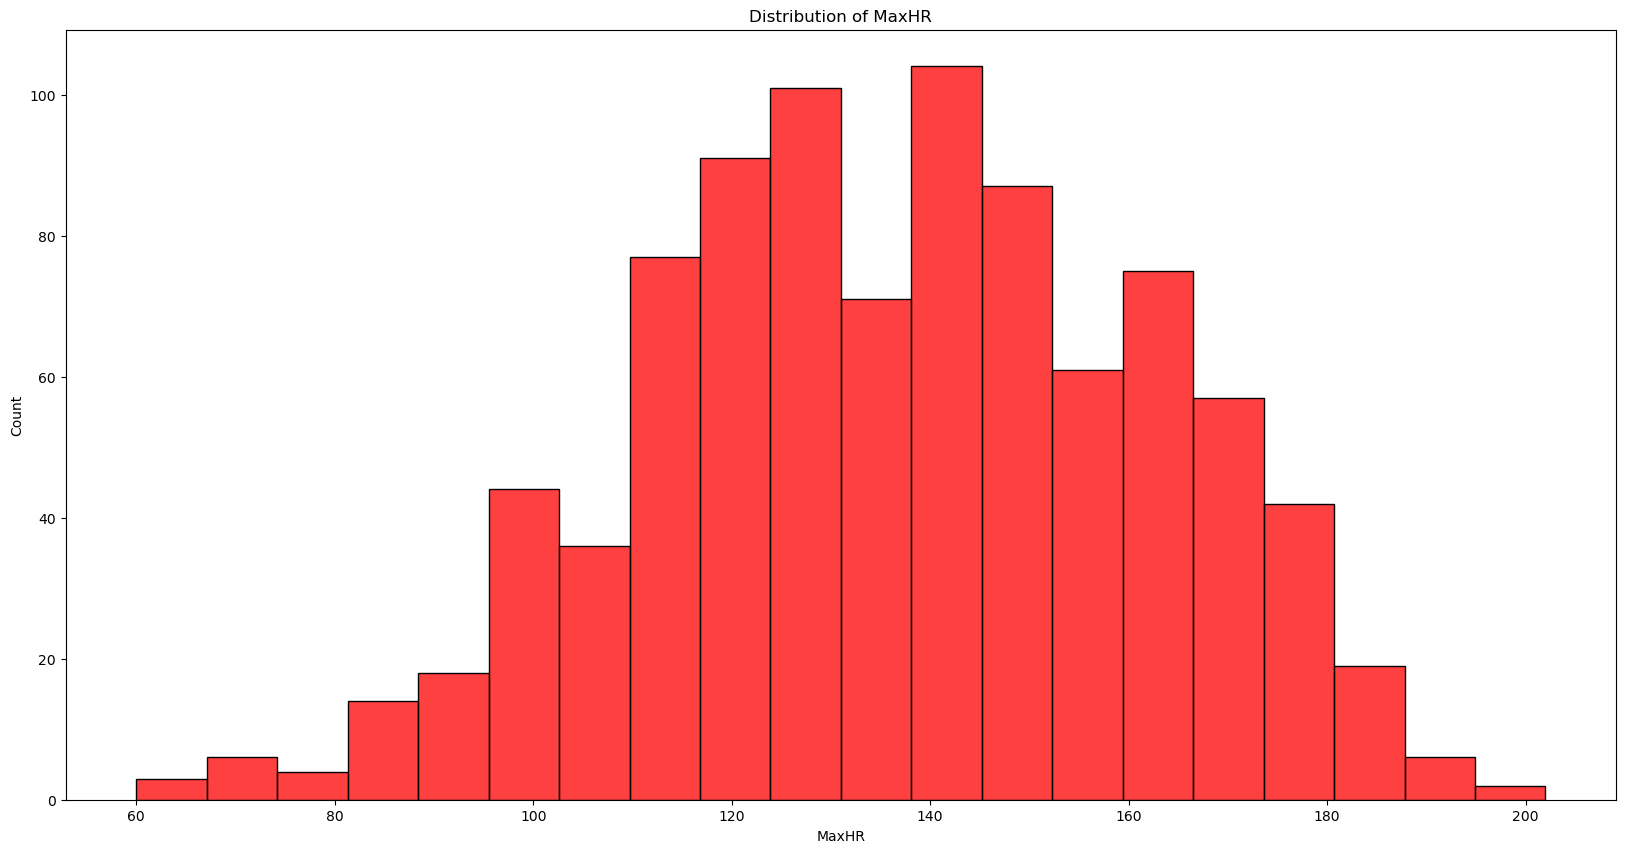

In [58]:
plt.figure(figsize=(20, 10))
sns.histplot(data=data, x="MaxHR",color="Red")
plt.title("Distribution of MaxHR")
plt.show()

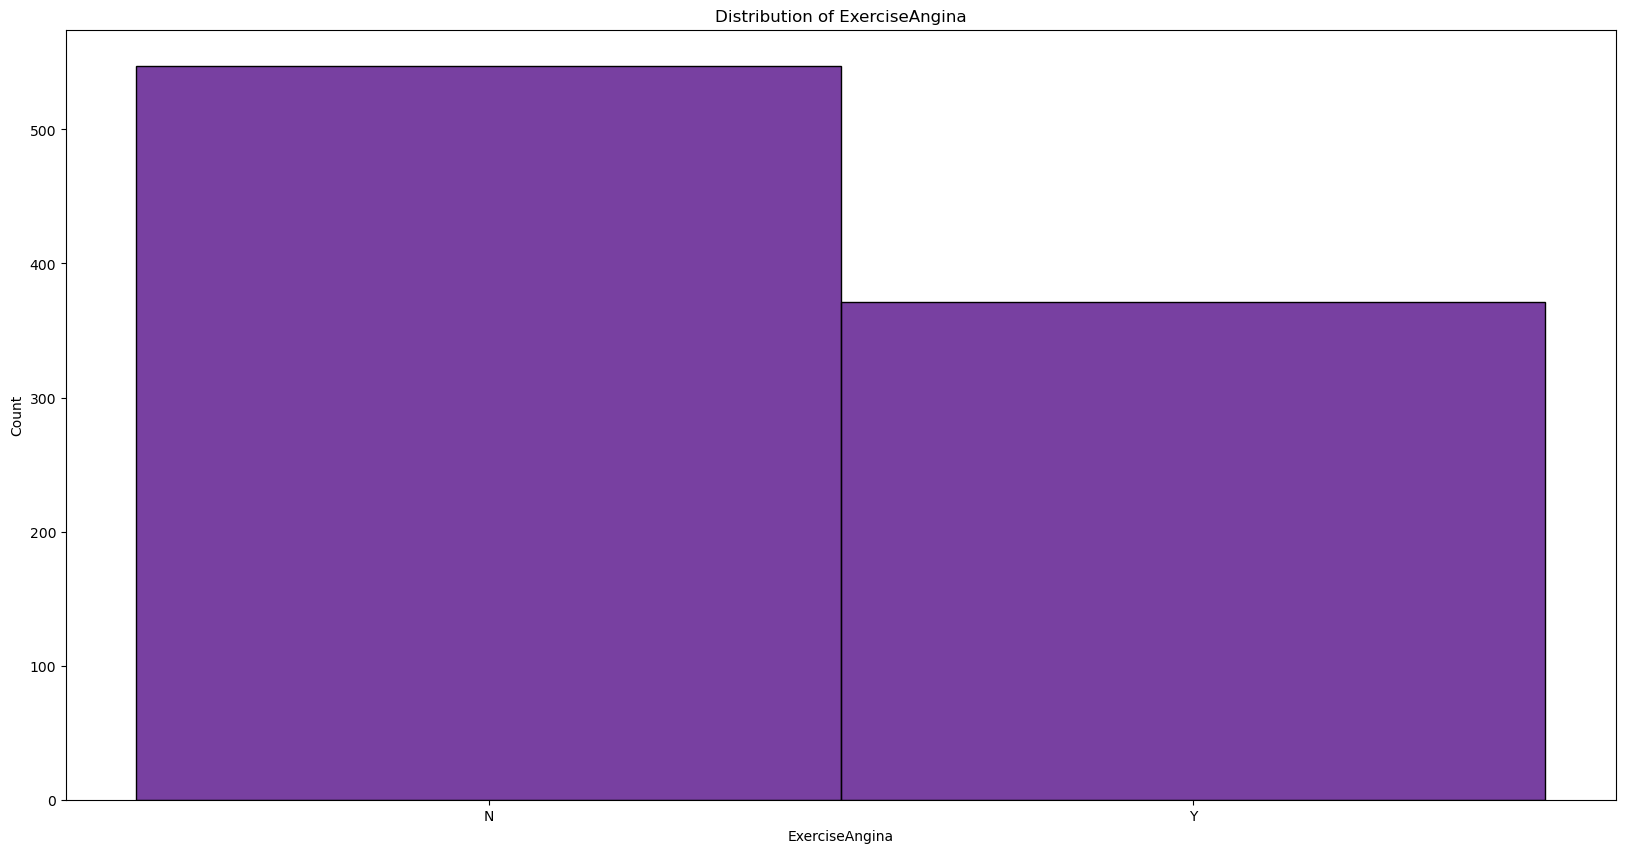

In [59]:
plt.figure(figsize=(20,10))
sns.histplot(data=data , x ="ExerciseAngina",color="Indigo")
plt.title("Distribution of ExerciseAngina" )
plt.show()

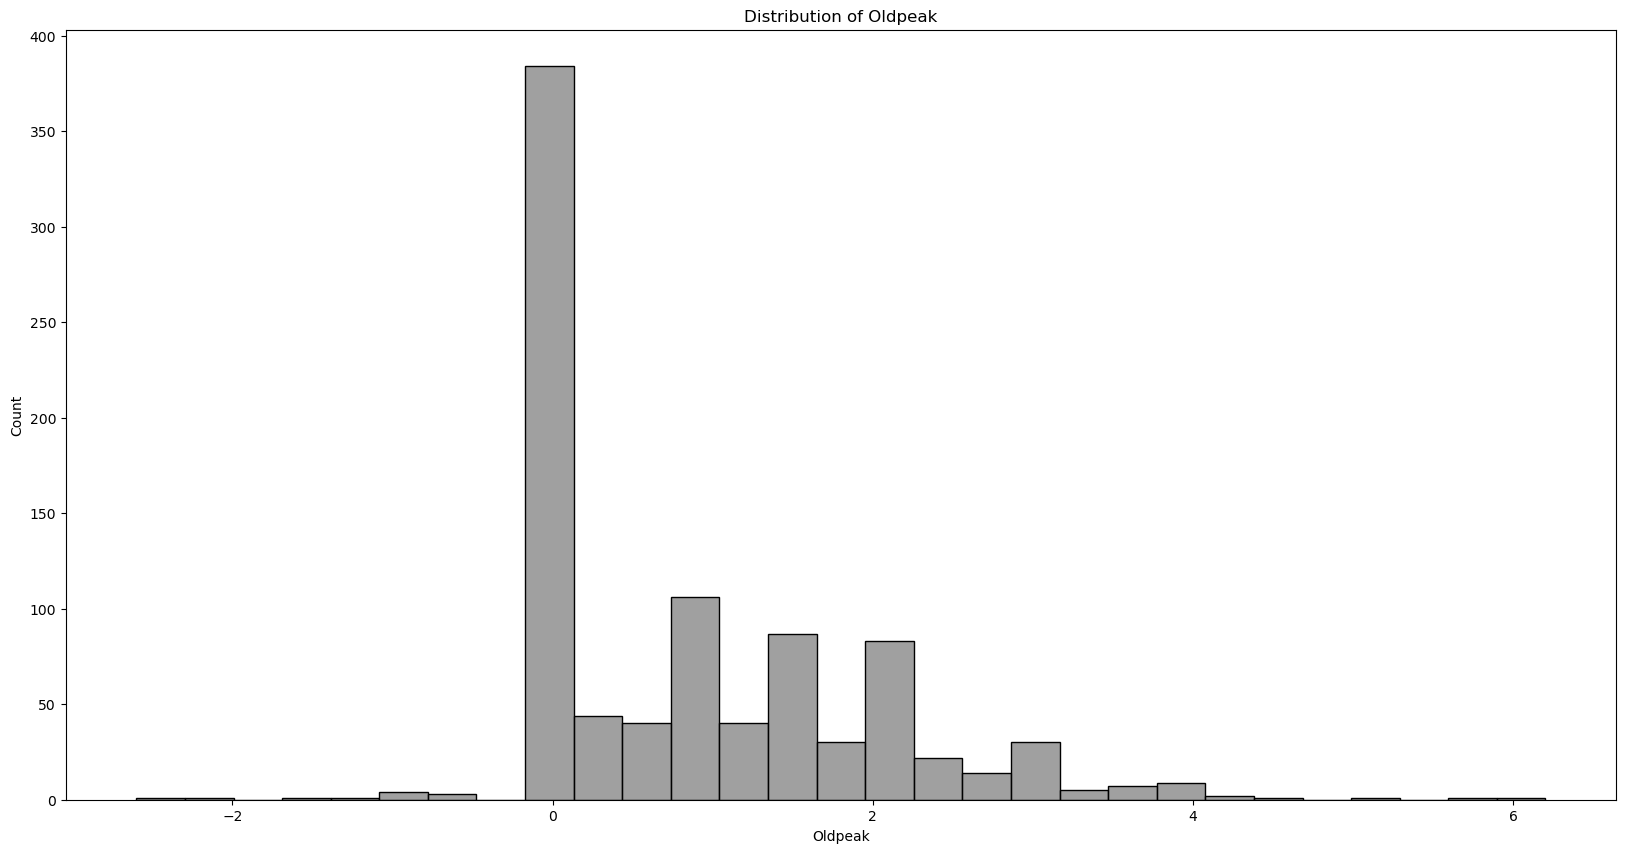

In [62]:
plt.figure(figsize=(20, 10))
sns.histplot(data=data, x="Oldpeak",color="gray")
plt.title("Distribution of Oldpeak")
plt.show()

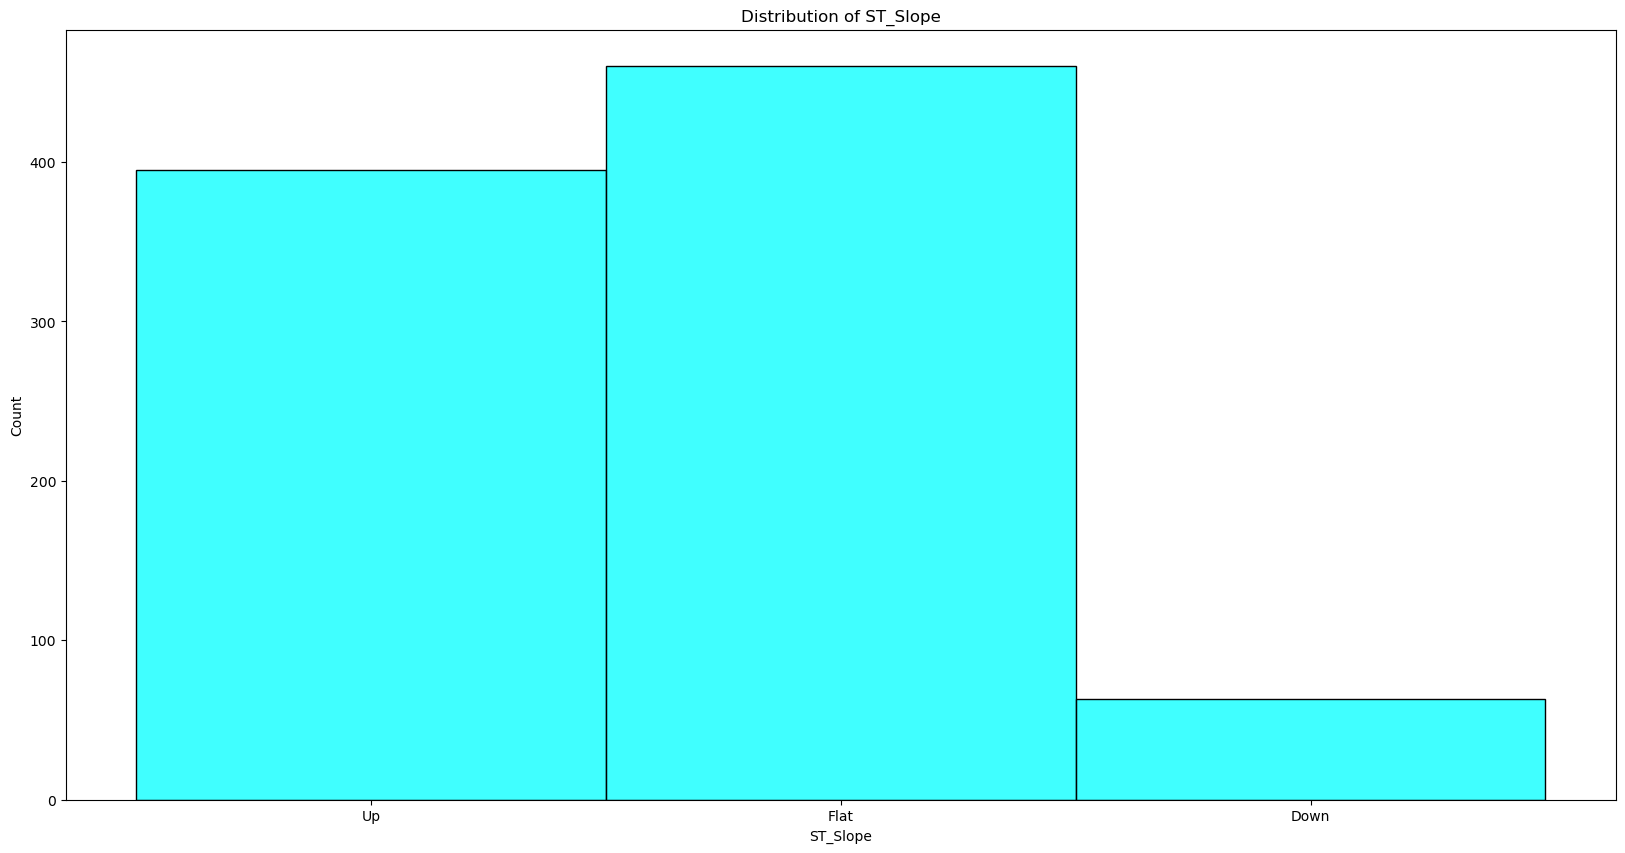

In [63]:
plt.figure(figsize=(20, 10))
sns.histplot(data=data, x="ST_Slope",color="cyan")
plt.title("Distribution of ST_Slope")
plt.show()

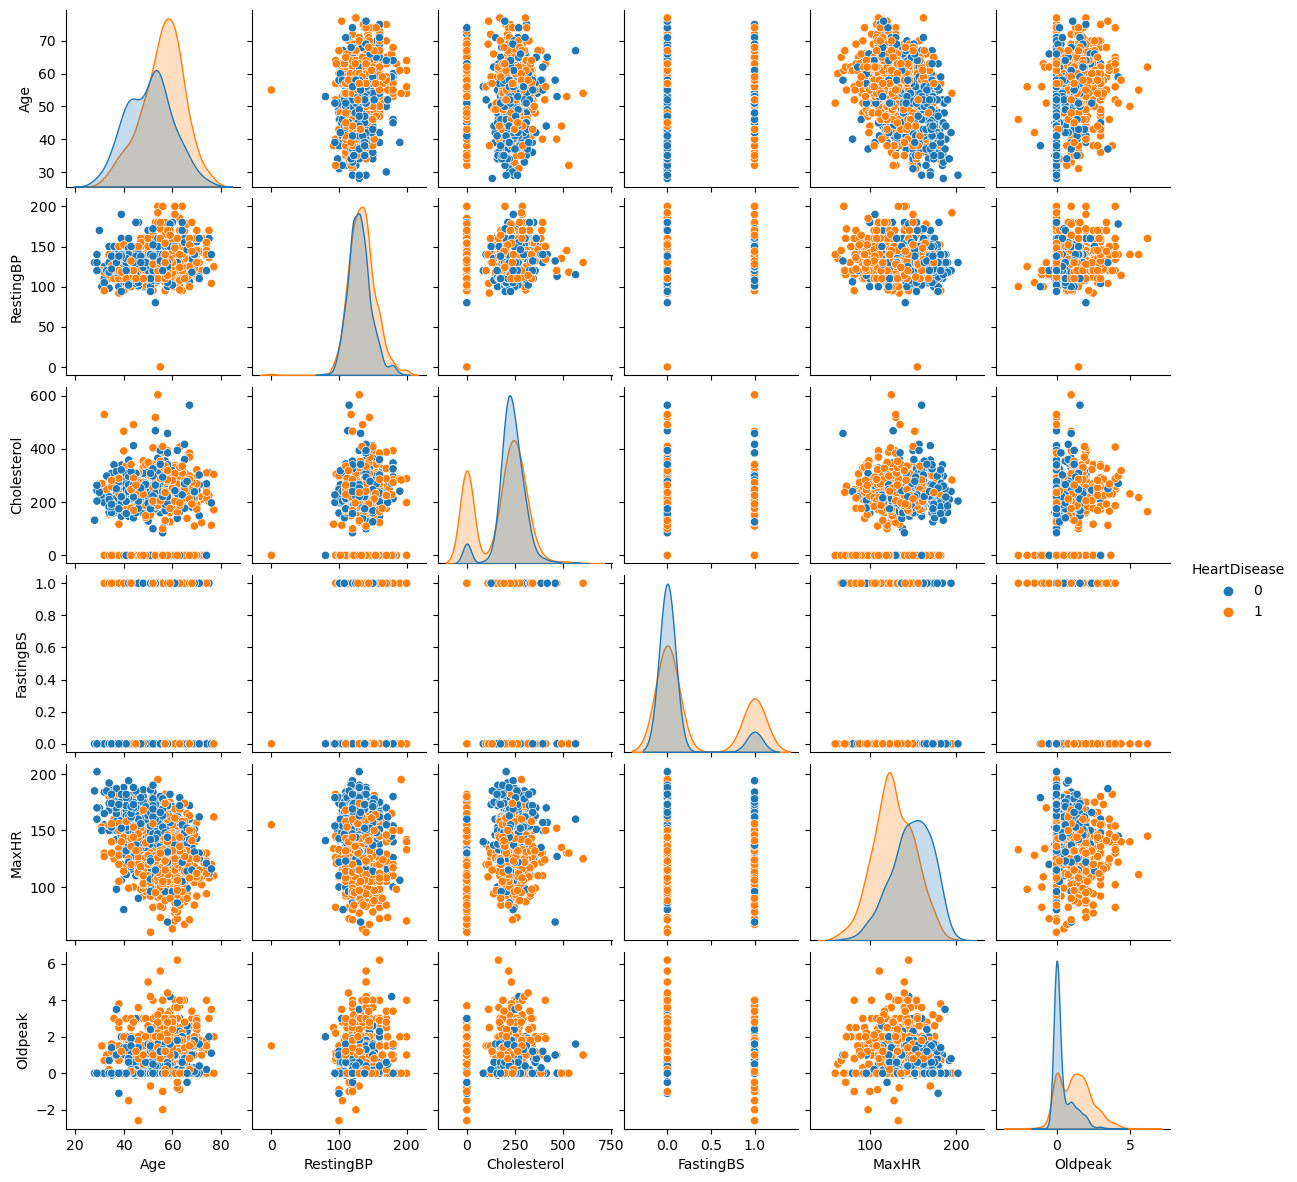

In [65]:
  sns.pairplot(data,hue = 'HeartDisease', height = 2)

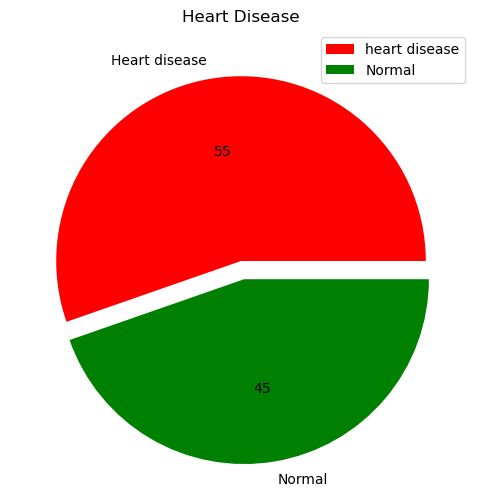

In [69]:
count= data['HeartDisease'].value_counts()
label=["Heart disease","Normal"]
plt.figure(figsize=(6,6))
plt.pie(count,labels=label,autopct='%.0f',explode=(0,.1), colors=['r','g'])
plt.legend( ['heart disease','Normal'],loc =1)

plt.title('Heart Disease')
plt.show()


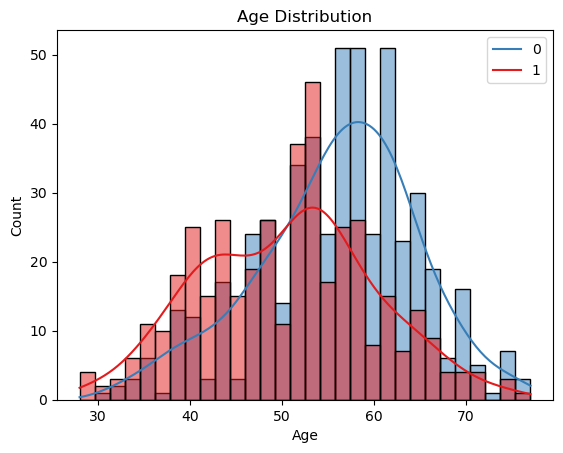

In [5]:
sns.histplot(data=data, x='Age', hue='HeartDisease', bins=30, kde=True, palette='Set1')
plt.legend([0,1])
plt.title('Age Distribution')
plt.show()

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:1826: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(x=self.x, y=self.y, **kwargs)


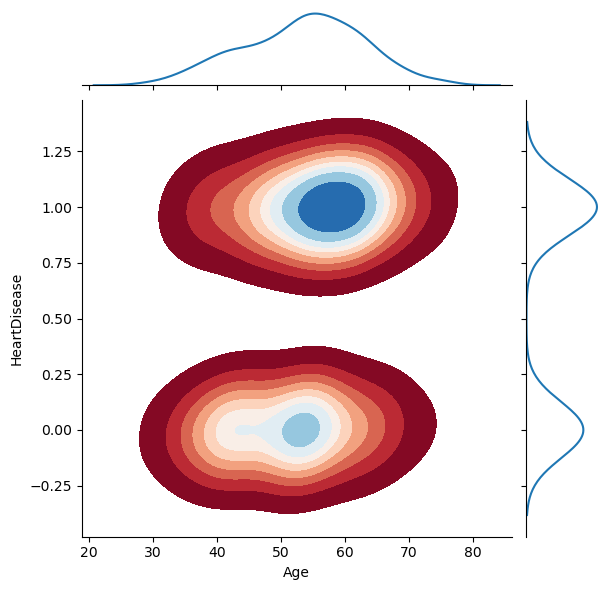

In [4]:
sns.jointplot(x="Age",y="HeartDisease",data=data , kind="kde" , shade=True , cmap="RdBu")

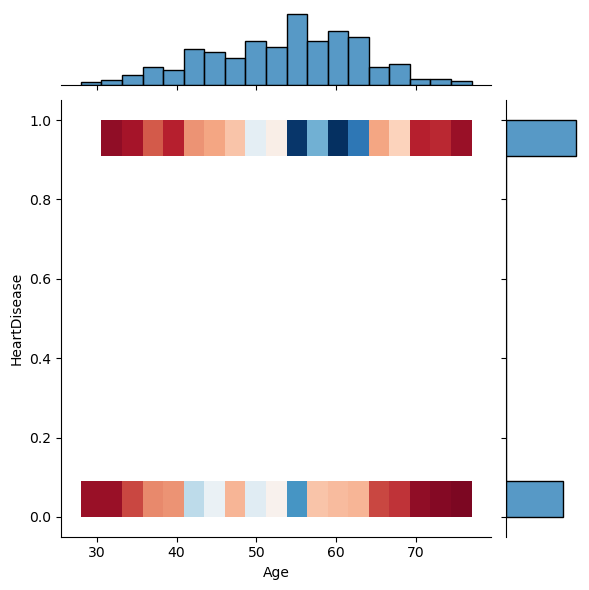

In [5]:
sns.jointplot(x="Age",y="HeartDisease",data=data , kind="hist",cmap="RdBu")

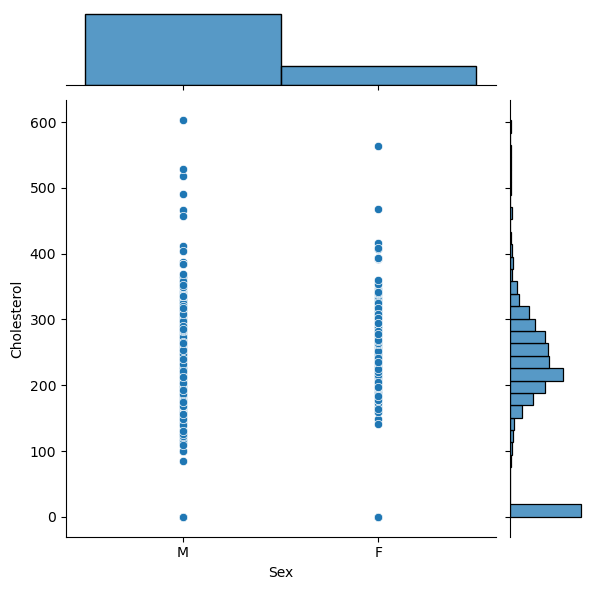

In [9]:
sns.jointplot(x="Sex",y="Cholesterol",data=data)

C:\Users\benec\AppData\Local\Temp\ipykernel_5988\2800768603.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(), annot=True, cmap='coolwarm', fmt=".2f")


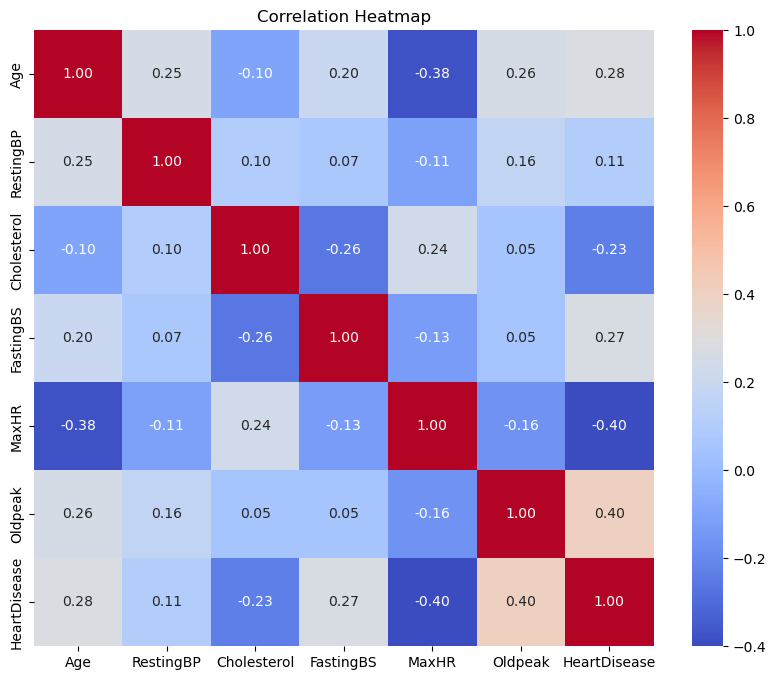

In [76]:
plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

# ML Algorithm 

## RANDOM FOREST 

In [5]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from sklearn.ensemble import RandomForestClassifier
import warnings

In [6]:
print(data.columns)

Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartDisease'],
      dtype='object')


In [7]:
df=pd.get_dummies(data,columns=['Sex','ChestPainType','RestingECG','ExerciseAngina','ST_Slope'],drop_first=True)
df


,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,Sex_M,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_Normal,RestingECG_ST,ExerciseAngina_Y,ST_Slope_Flat,ST_Slope_Up
0,40,140,289,0,172,0.0,0,1,1,0,0,1,0,0,0,1
1,49,160,180,0,156,1.0,1,0,0,1,0,1,0,0,1,0
2,37,130,283,0,98,0.0,0,1,1,0,0,0,1,0,0,1
3,48,138,214,0,108,1.5,1,0,0,0,0,1,0,1,1,0
4,54,150,195,0,122,0.0,0,1,0,1,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,110,264,0,132,1.2,1,1,0,0,1,1,0,0,1,0
914,68,144,193,1,141,3.4,1,1,0,0,0,1,0,0,1,0
915,57,130,131,0,115,1.2,1,1,0,0,0,1,0,1,1,0
916,57,130,236,0,174,0.0,1,0,1,0,0,0,0,0,1,0


In [8]:
X = df[['Age']]  # Features
y = df['HeartDisease']  # Target


In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [10]:
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)


In [11]:
rf_classifier.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [12]:
y_pred = rf_classifier.predict(X_test)

In [13]:
report_rf = classification_report(y_test, y_pred)
print(report_rf)


              precision    recall  f1-score   support

           0       0.52      0.48      0.50        77
           1       0.65      0.68      0.66       107

    accuracy                           0.60       184
   macro avg       0.58      0.58      0.58       184
weighted avg       0.59      0.60      0.60       184



In [14]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")


Accuracy: 0.5978


In [15]:
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)


Confusion Matrix:
 [[37 40]
 [34 73]]


In [16]:
class_report = classification_report(y_test, y_pred)
print("Classification Report:\n", class_report)


Classification Report:
               precision    recall  f1-score   support

           0       0.52      0.48      0.50        77
           1       0.65      0.68      0.66       107

    accuracy                           0.60       184
   macro avg       0.58      0.58      0.58       184
weighted avg       0.59      0.60      0.60       184



In [17]:

# Create a range of ages for visualization
#age_range = np.linspace(df['Age'].min(), df['Age'].max(), 100).reshape(-1, 1)
age_range = pd.DataFrame({'Age': np.linspace(df['Age'].min(), df['Age'].max(), 100)})




In [18]:
# Predict the target variable for the age range
predictions = rf_classifier.predict(age_range)
predictions

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1,
       1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1], dtype=int64)

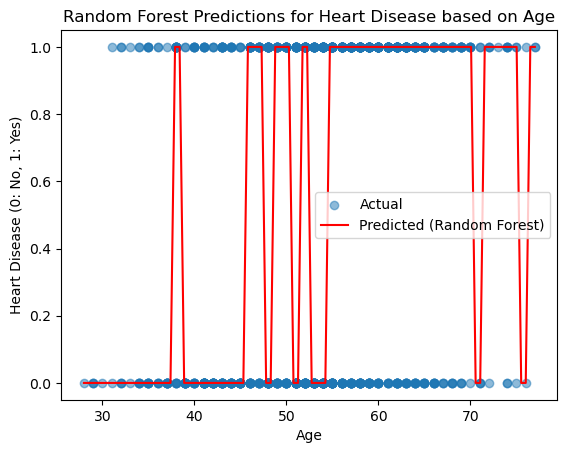

In [19]:
plt.scatter(df['Age'], df['HeartDisease'], alpha=0.5, label='Actual')
plt.plot(age_range, predictions, color='red', label='Predicted (Random Forest)')
plt.xlabel('Age')
plt.ylabel('Heart Disease (0: No, 1: Yes)')
plt.title('Random Forest Predictions for Heart Disease based on Age')
plt.legend()
plt.show()